This dataset is from the Kaggle Tabular Playground Series and have properties relating to real-world features. Although the data for this Machine Learning Project isn't from the real world, it is inspired from a real word dataset. 

In [77]:
#Import neccessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import cross_val_score
from keras import Sequential 
from keras.layers import Dense, Embedding, Conv1D, Flatten, Dropout
sns.set_theme()
print("Imported modules!")

Imported modules!


In [116]:
#Read the training and testing datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.isnull().sum())
print(test.isnull().sum())

id            0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
             ..
feature_71    0
feature_72    0
feature_73    0
feature_74    0
target        0
Length: 77, dtype: int64
id            0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
             ..
feature_70    0
feature_71    0
feature_72    0
feature_73    0
feature_74    0
Length: 76, dtype: int64


We can start off by doing some basic data analysis to get information on the input dataset

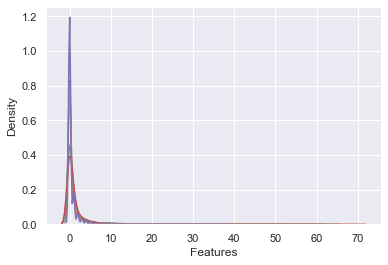

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 121 123 125 127 130 132 137 139
 145 148 149 158 161 171 172 180 231 252 253 263 287 311 325 352]


In [113]:
#Map the skewness of the first 5 columns of the dataset through histograms

for col in train.columns[1:6]:
    sns.kdeplot(train[col])
plt.xlabel('Features')
plt.show()

#Get all the individual features

flattened_train = np.ravel(np.array(train[train.columns[1:-1]]))
all_features = np.unique(flattened_train)
print(all_features)

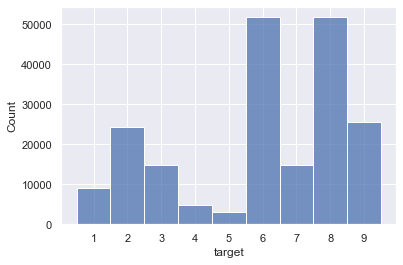

In [107]:
#Map the target variables into a histogram

class2int = {cl: str(index+1) for index, cl in enumerate(np.unique(np.array(train['target'])))}
train_ = train
train_['target'] = train_['target'].map(class2int)
train_ = train_.sort_values('target')

sns.histplot(train_['target'])
plt.show()

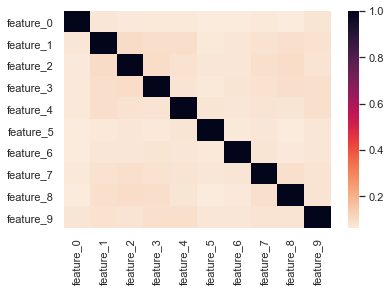

In [110]:
#Map the correlation of the first 10 features in the dataset

train_matrix = train[train.columns[1:11]]
sns.heatmap(train_matrix.corr(), cmap='rocket_r')
plt.show()

Now that the datasets have been stored in a DataFrame variable, we can begin to preform data analysis on the training dataset. 

In general for Machine Learning, the variables within the dataset should:

Have a normal distribution(not be skewed)
Have no outliers
Not being highly correlated

We know that the variables do not have a normal distribution, and based on the distribution of variables there appear to be outliers. However, it does not appear like the features are very correlated. 

We will preform data cleaning for each of these steps just to be sure. 

In [117]:
#Check for the skewness of every variable

total_skew = [np.absolute(train[col].skew()) for col in train.columns[1:-1]]
col2skew = {col: skew for col, skew in zip(train.columns[1:-1], total_skew)}

#Square root transform the columns with high skewness

for col in train.columns[1:-1]:
    if col2skew[col] > 1:
        train[col] = np.sqrt(train[col])
        print("Column: {} Old Skew: {} New Skew: {}".format(col, col2skew[col], train[col].skew()))
        
#Do the same but for the test dataset

for col in test.columns[1:]:
    if col2skew[col] > 1:
        test[col] = np.sqrt(test[col])   

Column: feature_0 Old Skew: 9.135533316477195 New Skew: 3.2723323995012756
Column: feature_1 Old Skew: 6.883517919240475 New Skew: 2.761689867052952
Column: feature_2 Old Skew: 5.362085956909249 New Skew: 2.3482669877811198
Column: feature_3 Old Skew: 5.735334220877397 New Skew: 2.7624490396246832
Column: feature_4 Old Skew: 7.284931986806691 New Skew: 3.013029848739192
Column: feature_5 Old Skew: 8.292962457939648 New Skew: 2.9908774602172006
Column: feature_6 Old Skew: 6.820749772710577 New Skew: 3.272786954020587
Column: feature_7 Old Skew: 7.1538253578349185 New Skew: 2.613909717442015
Column: feature_8 Old Skew: 3.2459710022167787 New Skew: 1.3867705055647104
Column: feature_9 Old Skew: 6.916119032655049 New Skew: 2.852342810709929
Column: feature_10 Old Skew: 5.1372671765973585 New Skew: 1.6589458464072067
Column: feature_11 Old Skew: 6.4324494009110635 New Skew: 3.3087926159745256
Column: feature_12 Old Skew: 3.353527608052105 New Skew: 0.6051719907533802
Column: feature_13 Old 

In [118]:
#Check and remove outliers for the training dataset

for col in train.columns[1:-1]:
    train = train[(np.abs(stats.zscore(train[col])) < 7.5)]

#Get the length of the new features

flattened_train = np.ravel(np.array(train[train.columns[1:-1]]))
all_features = np.unique(flattened_train)
print(all_features)
print(len(all_features))

[ 0.          1.          1.41421356  1.73205081  2.          2.23606798
  2.44948974  2.64575131  2.82842712  3.          3.16227766  3.31662479
  3.46410162  3.60555128  3.74165739  3.87298335  4.          4.12310563
  4.24264069  4.35889894  4.47213595  4.58257569  4.69041576  4.79583152
  4.89897949  5.          5.09901951  5.19615242  5.29150262  5.38516481
  5.47722558  5.56776436  5.65685425  5.74456265  5.83095189  5.91607978
  6.          6.08276253  6.164414    6.244998    6.32455532  6.40312424
  6.4807407   6.55743852  6.63324958  6.70820393  6.78232998  6.8556546
  6.92820323  7.          7.07106781  7.14142843  7.21110255  7.28010989
  7.34846923  7.41619849  7.48331477  7.54983444  7.61577311  7.68114575
  7.74596669  7.81024968  7.87400787  7.93725393  8.          8.06225775
  8.1240384   8.18535277  8.24621125  8.30662386  8.36660027  8.42614977
  8.48528137  8.54400375  8.60232527  8.66025404  8.71779789  8.77496439
  8.83176087  8.88819442  8.94427191  9.          9.

In [50]:
#Check and remove highly correlated variables from the training and testing dataset

train_corr = train.drop(['id', 'target'], axis=1).corr()
train_ = train

col_remove = []
for col1 in train.columns[1:-1]:
    for col2 in train.columns[1:-1]:
        if col1 != col2 and train_corr[col1][col2] >= 0.3:
            col_remove.append([col1, col2])
col_remove = np.unique(np.ravel(col_remove))

print(col_remove) #There are no correlated variables, so there is no need to remove any

[]


Now that we have cleaned the dataset, we can begin constructing and training the neural network. The loss will be categorical crossentropy, as the problem is categorical and the testing dataset requires the probability of each of the classes. The individual numbers within the data, even when square rooted, represent something meaningful. Therefore, an Embedding layer with Convolutions will be preformed before a fully connected Layer, as the same with text classification. 

In [78]:
#Put the training variables and the target variables into numpy arrays

X_train = np.array(train.drop(['id', 'target'], axis=1))
y_train = np.array(train['target']).reshape(-1,1)
X_test = np.array(test.drop('id', axis=1))

#Convert y_train using OneHotEncoder to prepare for Cross Entropy 

y_train = np.array(OneHotEncoder().fit_transform(y_train).toarray())

#Make the neural network model and train it for 3 epochs

model = Sequential([
    Embedding(input_dim=109, output_dim=8, input_length=input_length),
    Conv1D(32, kernel_size=3, padding='same', activation='relu'),
    Flatten(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(9, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.05)

#Make the predictions

X_pred = np.array(model.predict(X_test)).reshape(-1, 9)

Epoch 1/3
2845/2845 [==============================] - 11s 3ms/step - loss: 1.7767 - accuracy: 0.3492 - val_loss: 1.7445 - val_accuracy: 0.3624
Epoch 2/3
2845/2845 [==============================] - 10s 3ms/step - loss: 1.7474 - accuracy: 0.3608 - val_loss: 1.7446 - val_accuracy: 0.3612
Epoch 3/3
2845/2845 [==============================] - 10s 3ms/step - loss: 1.7439 - accuracy: 0.3613 - val_loss: 1.7523 - val_accuracy: 0.3616


In [76]:
X_test_id = np.array(test['id'])

df_out = pd.DataFrame({
    'id':X_test_id,
    'Class_1':X_pred[:,0],
    'Class_2':X_pred[:,1],
    'Class_3':X_pred[:,2],
    'Class_4':X_pred[:,3],
    'Class_5':X_pred[:,4],
    'Class_6':X_pred[:,5],
    'Class_7':X_pred[:,6],
    'Class_8':X_pred[:,7],
    'Class_9':X_pred[:,8],
})
df_out.to_csv('tabular_pred.csv', index=False) #Testing loss of 1.74864

print("Finished!")

Finished!
